# One-vs-All Classification

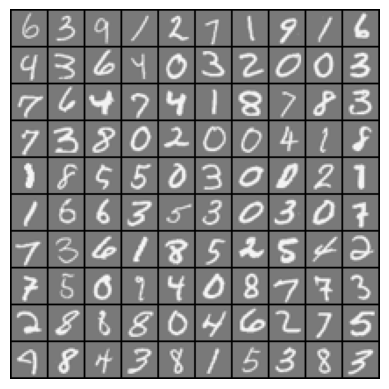

Optimization terminated successfully.
         Current function value: 0.008583
         Iterations: 288
         Function evaluations: 289
         Gradient evaluations: 289
Optimization terminated successfully.
         Current function value: 0.013128
         Iterations: 286
         Function evaluations: 287
         Gradient evaluations: 287
Optimization terminated successfully.
         Current function value: 0.050810
         Iterations: 439
         Function evaluations: 440
         Gradient evaluations: 440
Optimization terminated successfully.
         Current function value: 0.057612
         Iterations: 424
         Function evaluations: 425
         Gradient evaluations: 425
Optimization terminated successfully.
         Current function value: 0.033075
         Iterations: 396
         Function evaluations: 397
         Gradient evaluations: 397
Optimization terminated successfully.
         Current function value: 0.054466
         Iterations: 433
         Function ev

In [1]:
#-*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as spio
from scipy import optimize
from matplotlib.font_manager import FontProperties

def logisticRegression_OneVsAll():
    data = spio.loadmat("data_digits.mat")
    X = data['X']   
    y = data['y']
    m,n = X.shape
    num_labels = 10 # 0-9
    
    ##　Randomly display a few rows of data
    rand_indices = rand_indices = np.random.randint(0, high=m, size=100) # Generate 100 0-m random numbers
    display_data(X[rand_indices,:])     # Randomly display 100 figures
     
    Lambda = 0.1    # Regularization coefficient
    all_theta = oneVsAll(X, y, num_labels, Lambda)  # calculate all theta
    
    p = predict_oneVsAll(all_theta,X)               # prediction
    print(u"Prediction Accuracy：%f%%"%np.mean(np.float64(p.reshape(-1,1) == y.reshape(-1,1))*100))

def display_data(imgData):
    sum = 0
    pad = 1
    display_array = -np.ones((pad+10*(20+pad),pad+10*(20+pad)))
    for i in range(10):
        for j in range(10):
            display_array[pad+i*(20+pad):pad+i*(20+pad)+20,pad+j*(20+pad):pad+j*(20+pad)+20] = (imgData[sum,:].reshape(20,20,order="F"))
            sum += 1
    plt.imshow(display_array,cmap='gray')   #Display grayscale images
    plt.axis('off')
    plt.show()


def oneVsAll(X,y,num_labels,Lambda):
    # Initialization
    m,n = X.shape
    all_theta = np.zeros((n+1,num_labels))  # Each column corresponds to the corresponding category of theta, a total of 10 columns
    X = np.hstack((np.ones((m,1)),X))       # Add bias
    class_y = np.zeros((m,num_labels))      # The y of the data corresponds to 0-9 and needs to be mapped to a 0/1 relationship
    initial_theta = np.zeros((n+1,1))       # Initialize a theta set of one class
    
    # Map y
    for i in range(num_labels):
        class_y[:,i] = np.int32(y == i).reshape(1,-1) 
    
    
    for i in range(num_labels):
        #optimize.fmin_cg
        result = optimize.fmin_bfgs(costFunction, initial_theta, fprime=gradient, args=(X,class_y[:,i],Lambda))
        all_theta[:,i] = result.reshape(1,-1)   # put into all_theta
        
    all_theta = np.transpose(all_theta) 
    return all_theta


def costFunction(initial_theta,X,y,inital_lambda):
    m = len(y)
    J = 0
    
    h = sigmoid(np.dot(X,initial_theta))  
    theta1 = initial_theta.copy()           
    theta1[0] = 0   
    
    temp = np.dot(np.transpose(theta1),theta1)
    J = (-np.dot(np.transpose(y),np.log(h))-np.dot(np.transpose(1-y),np.log(1-h))+temp*inital_lambda/2)/m   
    return J


def gradient(initial_theta,X,y,inital_lambda):
    m = len(y)
    grad = np.zeros((initial_theta.shape[0]))
    
    h = sigmoid(np.dot(X,initial_theta))  
    theta1 = initial_theta.copy()
    theta1[0] = 0

    grad = np.dot(np.transpose(X),h-y)/m+inital_lambda/m*theta1 
    return grad   
    
def sigmoid(z):
    h = np.zeros((len(z),1))   
    
    h = 1.0/(1.0+np.exp(-z))
    return h

def predict_oneVsAll(all_theta,X):
    m = X.shape[0]
    num_labels = all_theta.shape[0]
    p = np.zeros((m,1))
    X = np.hstack((np.ones((m,1)),X))   
    h = sigmoid(np.dot(X,np.transpose(all_theta))) 
    p = np.argmax(h, axis=1)  #
    return p
        
        
if __name__ == "__main__":
    logisticRegression_OneVsAll()